# Trevor Taylor

## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

## Upwind Method

Recall the solution is just original profile displaced by $v t$.
So the information is propagating from left to right if $v > 0$. The central difference
thus should use information from the upstream. 

The spatial derivative is approximated with the one-sided difference
\begin{eqnarray}
U_{x}=\frac{U_{j}^n-U_{j-1}^n}{\Delta x} \qquad if \qquad v>0\\
U_{x}=\frac{U_{j+1}^n-U_{j}^n}{\Delta x} \qquad if \qquad v<0\\
\end{eqnarray}
It has the same stability requirement as the Lax-Friedrichs method
\begin{equation}
U_j^{n+1}=U_j^n-(v\Delta t) U_{x}
\end{equation}

# 1)

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007


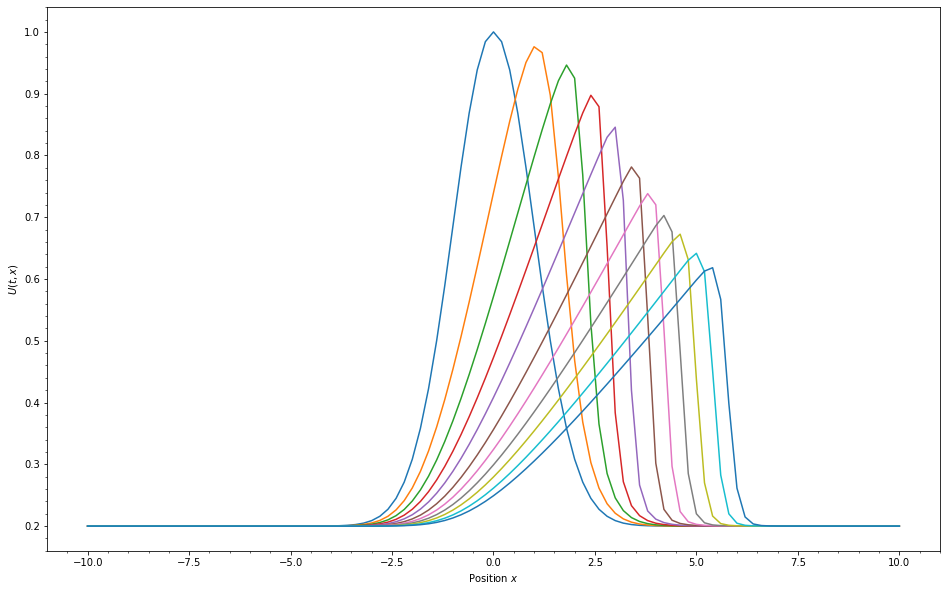

In [1]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0


fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

tout = t + dtout
while t < tend:
    Uold = np.copy(U)
    
    # for loop to iterate the position
    # after is an if statement to check if the U term is positive or negative
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
            
        else:
            U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        print("t = ", t)
        tout += dtout

# 2)

By for looping over the coefficent of dt, from .1 to 2 in intervals of .1 we can see how the grid size effects
the outcome. At 1.2 we see that later in time the peaks get bigger which is an indication that something is wrong.
After that the results become very unphysical and then quickly become unstable.

For the upwind method we know that the stability requirement in this case is

$$ \Delta t \leq \dfrac{\Delta x}{U} $$

We can see that this depends on U. If we use the maximum value of U, 1, then dt must be less than 1*dx. However,
since it is a function of U and since U is in a gaussian profile and it is not perfectly advecting, then the
actual point where it becomes unstable is a bit further away at 1.3.

gridSize = Delta x * 0.1
t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.019999999999981
t =  6.01999999999996
t =  7.019999999999938
t =  8.019999999999918
t =  9.019999999999897
t =  10.019999999999875
t =  11.019999999999854
t =  12.019999999999833
t =  13.019999999999811
t =  14.01999999999979
t =  15.019999999999769
t =  16.019999999999747
t =  17.019999999999726
t =  18.019999999999705
t =  19.019999999999683
t =  20.019999999999662


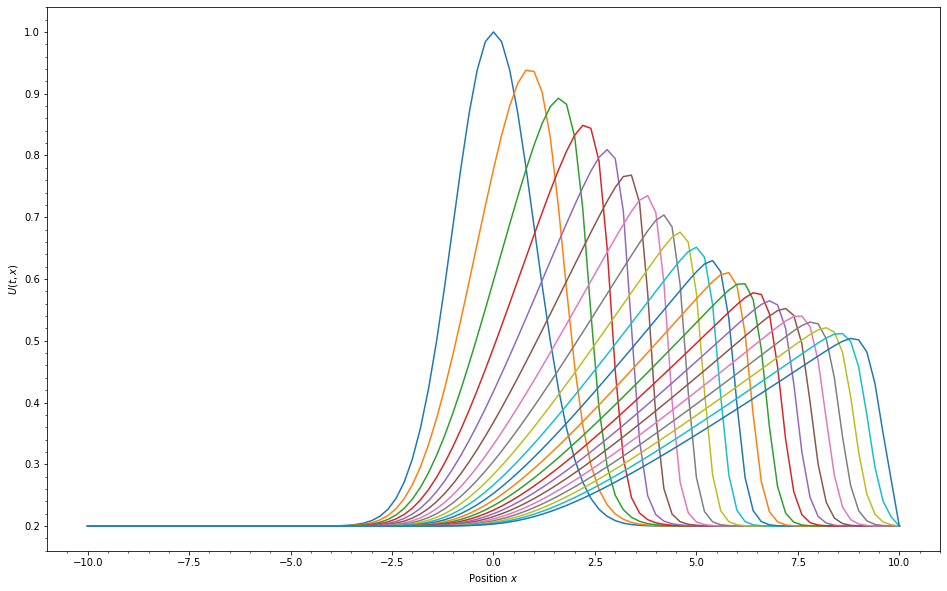

gridSize = Delta x * 0.2
t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.0000000000000036
t =  6.000000000000004
t =  7.000000000000005
t =  8.000000000000005
t =  9.039999999999983
t =  10.039999999999962
t =  11.03999999999994
t =  12.03999999999992
t =  13.039999999999898
t =  14.039999999999877
t =  15.039999999999855
t =  16.039999999999836
t =  17.039999999999814
t =  18.039999999999793
t =  19.03999999999977
t =  20.03999999999975


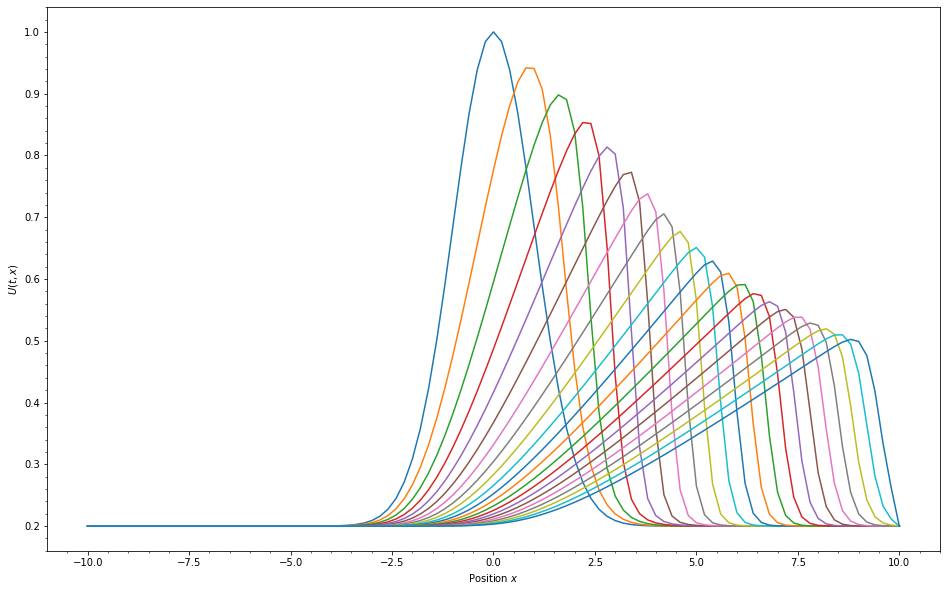

gridSize = Delta x * 0.30000000000000004
t =  1.0200000000000005
t =  2.0400000000000014
t =  3.000000000000002
t =  4.020000000000003
t =  5.0399999999999965
t =  6.05999999999999
t =  7.019999999999984
t =  8.039999999999978
t =  9.059999999999986
t =  10.019999999999994
t =  11.040000000000003
t =  12.00000000000001
t =  13.02000000000002
t =  14.040000000000028
t =  15.000000000000036
t =  16.020000000000042
t =  17.04000000000002
t =  18.0
t =  19.01999999999998
t =  20.039999999999957


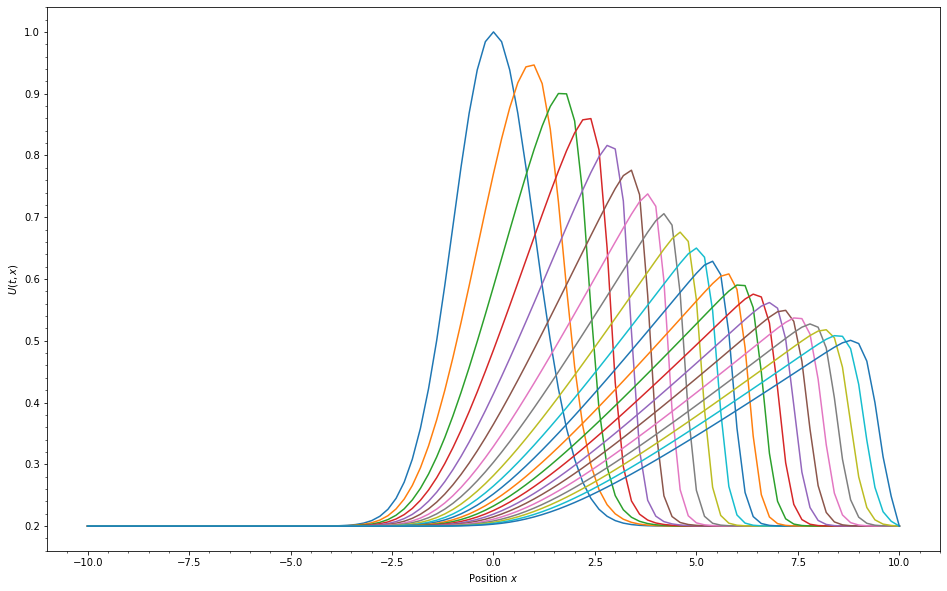

gridSize = Delta x * 0.4
t =  1.0400000000000005
t =  2.0000000000000013
t =  3.0400000000000023
t =  4.000000000000003
t =  5.040000000000004
t =  6.000000000000004
t =  7.040000000000005
t =  8.000000000000005
t =  9.040000000000006
t =  10.000000000000007
t =  11.040000000000008
t =  12.000000000000009
t =  13.04000000000001
t =  14.00000000000001
t =  15.040000000000012
t =  16.00000000000001
t =  17.03999999999999
t =  18.079999999999966
t =  19.039999999999946
t =  20.079999999999924


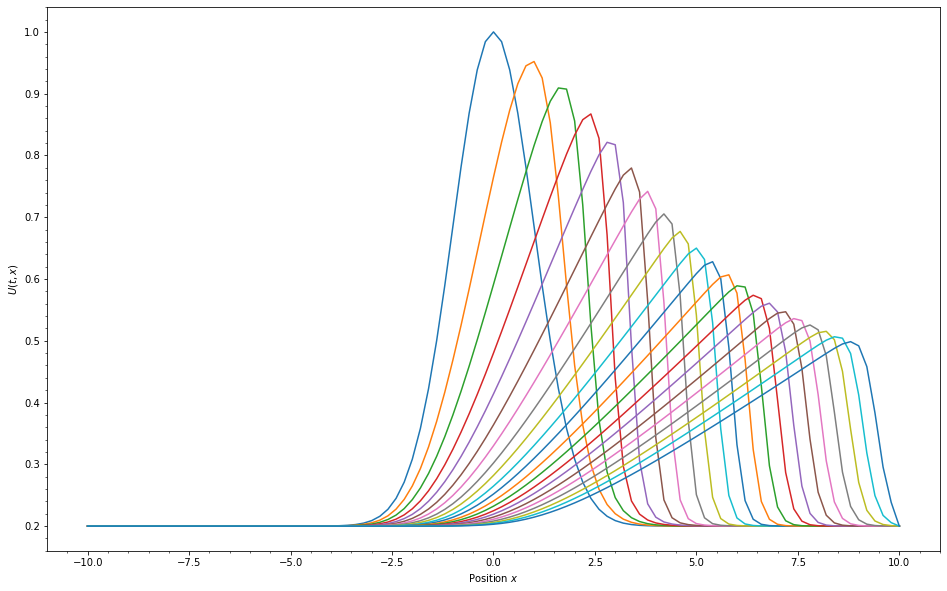

gridSize = Delta x * 0.5
t =  1.0999999999999999
t =  2.0000000000000004
t =  3.0000000000000013
t =  4.000000000000002
t =  5.099999999999998
t =  6.099999999999994
t =  7.099999999999991
t =  8.099999999999987
t =  9.099999999999984
t =  10.09999999999998
t =  11.099999999999977
t =  12.099999999999973
t =  13.09999999999997
t =  14.099999999999966
t =  15.099999999999962
t =  16.09999999999996
t =  17.099999999999973
t =  18.099999999999987
t =  19.0
t =  20.000000000000014


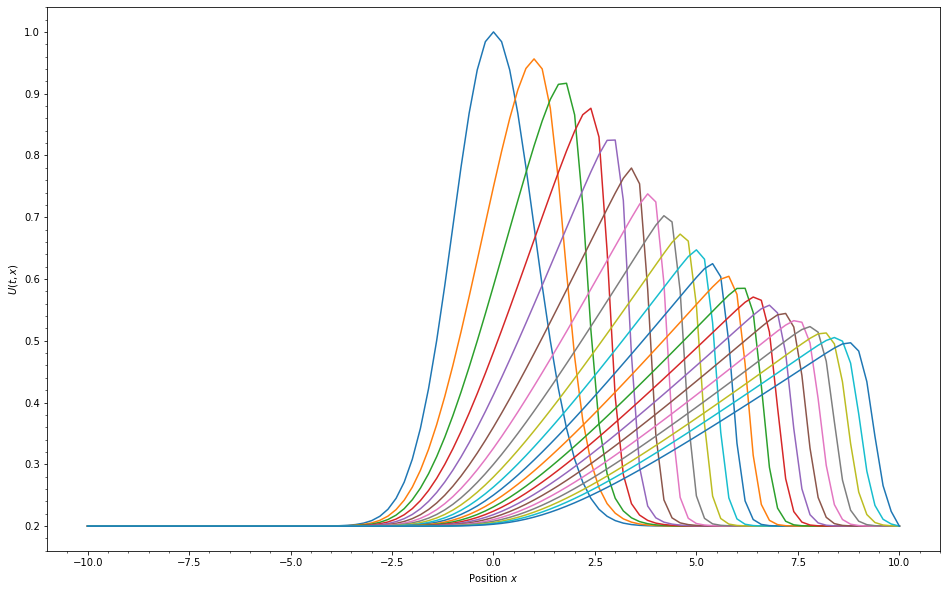

gridSize = Delta x * 0.6
t =  1.08
t =  2.040000000000001
t =  3.0000000000000018
t =  4.080000000000003
t =  5.040000000000004
t =  6.000000000000004
t =  7.080000000000005
t =  8.040000000000006
t =  9.0
t =  10.079999999999993
t =  11.039999999999987
t =  12.11999999999998
t =  13.079999999999973
t =  14.039999999999967
t =  15.11999999999996
t =  16.079999999999956
t =  17.039999999999964
t =  18.119999999999973
t =  19.07999999999998
t =  20.03999999999999


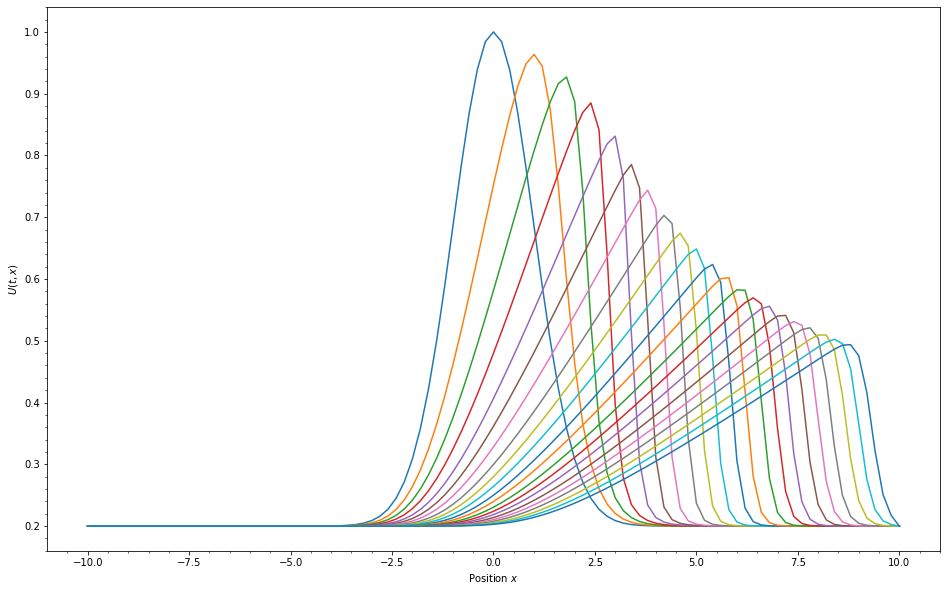

gridSize = Delta x * 0.7000000000000001
t =  1.12
t =  2.100000000000001
t =  3.080000000000002
t =  4.060000000000002
t =  5.04
t =  6.019999999999998
t =  7.139999999999995
t =  8.119999999999994
t =  9.099999999999998
t =  10.080000000000002
t =  11.060000000000006
t =  12.04000000000001
t =  13.020000000000014
t =  14.000000000000018
t =  15.120000000000022
t =  16.100000000000026
t =  17.08000000000003
t =  18.060000000000034
t =  19.04000000000004
t =  20.020000000000042


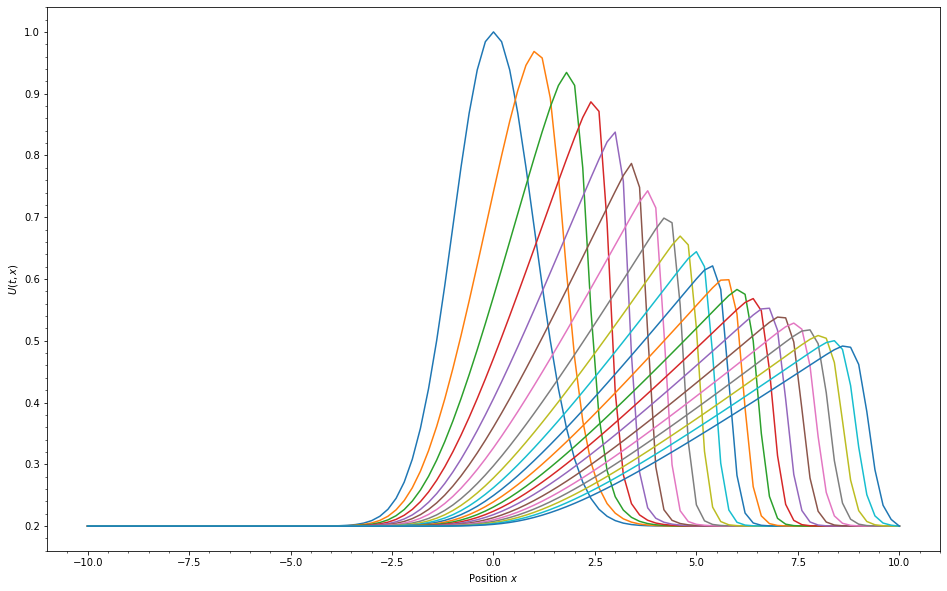

gridSize = Delta x * 0.8
t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
t =  11.040000000000008
t =  12.000000000000009
t =  13.12000000000001
t =  14.08000000000001
t =  15.040000000000012
t =  16.00000000000001
t =  17.12000000000001
t =  18.080000000000013
t =  19.040000000000013
t =  20.000000000000014


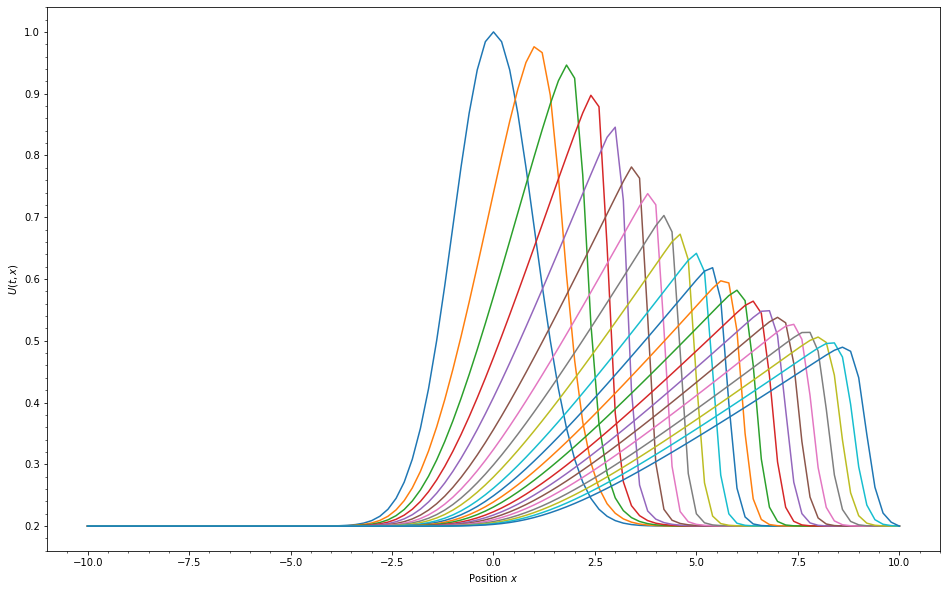

gridSize = Delta x * 0.9
t =  1.08
t =  2.1599999999999997
t =  3.0600000000000005
t =  4.1400000000000015
t =  5.04
t =  6.119999999999998
t =  7.019999999999997
t =  8.099999999999996
t =  9.179999999999994
t =  10.079999999999993
t =  11.159999999999991
t =  12.05999999999999
t =  13.139999999999988
t =  14.039999999999987
t =  15.119999999999985
t =  16.019999999999985
t =  17.099999999999984
t =  18.179999999999982
t =  19.07999999999998
t =  20.15999999999998


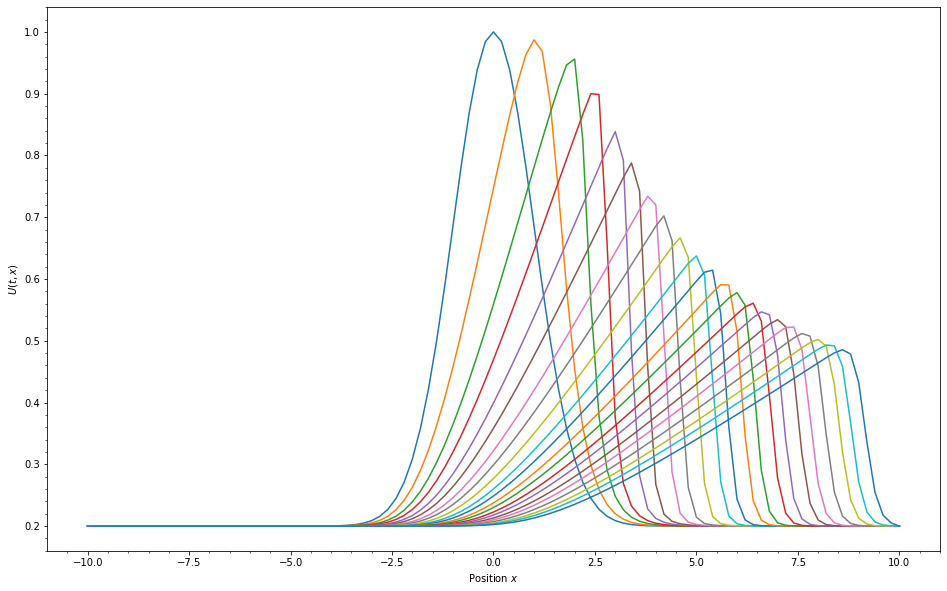

gridSize = Delta x * 1.0
t =  1.0
t =  2.1999999999999997
t =  3.0000000000000004
t =  4.000000000000001
t =  5.000000000000002
t =  6.000000000000003
t =  7.0000000000000036
t =  8.000000000000004
t =  9.0
t =  10.199999999999996
t =  11.199999999999992
t =  12.199999999999989
t =  13.199999999999985
t =  14.199999999999982
t =  15.199999999999978
t =  16.199999999999974
t =  17.19999999999997
t =  18.199999999999967
t =  19.199999999999964
t =  20.19999999999996


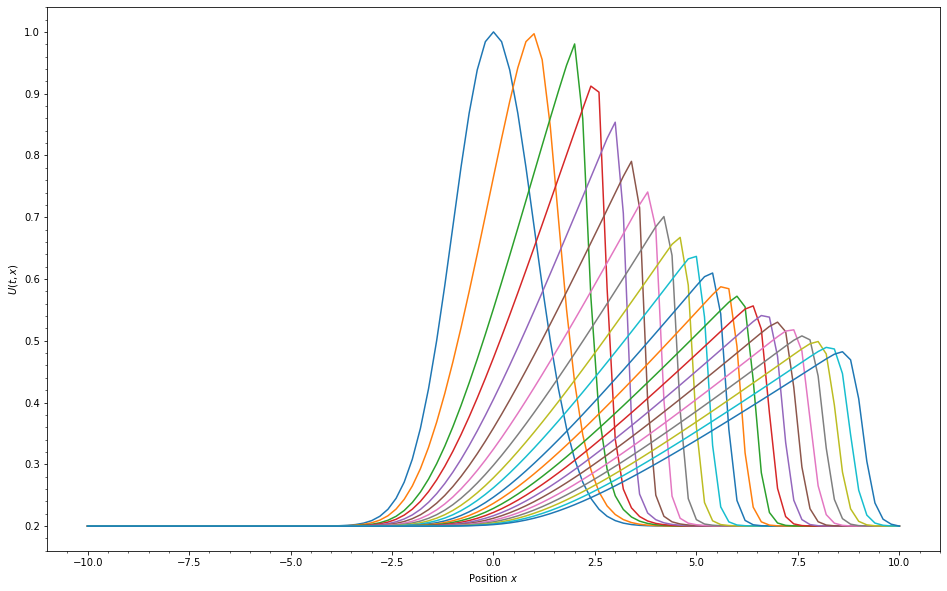

gridSize = Delta x * 1.1
t =  1.1
t =  2.2
t =  3.080000000000001
t =  4.1800000000000015
t =  5.0600000000000005
t =  6.159999999999999
t =  7.039999999999998
t =  8.139999999999997
t =  9.02
t =  10.120000000000003
t =  11.000000000000005
t =  12.100000000000009
t =  13.200000000000012
t =  14.080000000000014
t =  15.180000000000017
t =  16.06000000000002
t =  17.160000000000014
t =  18.04000000000001
t =  19.140000000000004
t =  20.02


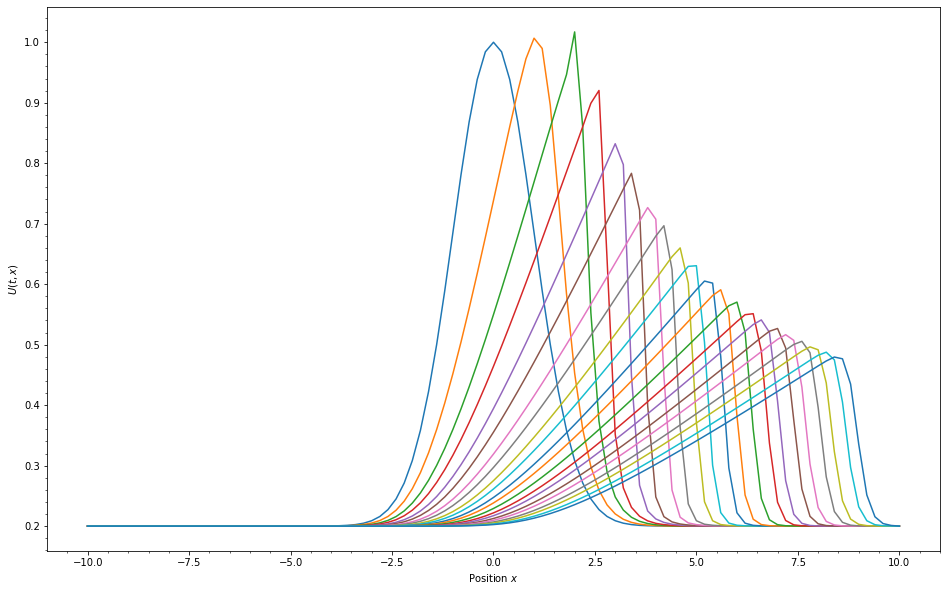

gridSize = Delta x * 1.2000000000000002
t =  1.2000000000000002
t =  2.16
t =  3.120000000000001
t =  4.080000000000002
t =  5.040000000000003
t =  6.0000000000000036
t =  7.200000000000005
t =  8.160000000000005
t =  9.120000000000006
t =  10.080000000000007
t =  11.040000000000008
t =  12.000000000000009
t =  13.20000000000001
t =  14.16000000000001
t =  15.120000000000012
t =  16.080000000000013
t =  17.040000000000006
t =  18.0
t =  19.199999999999992
t =  20.159999999999986


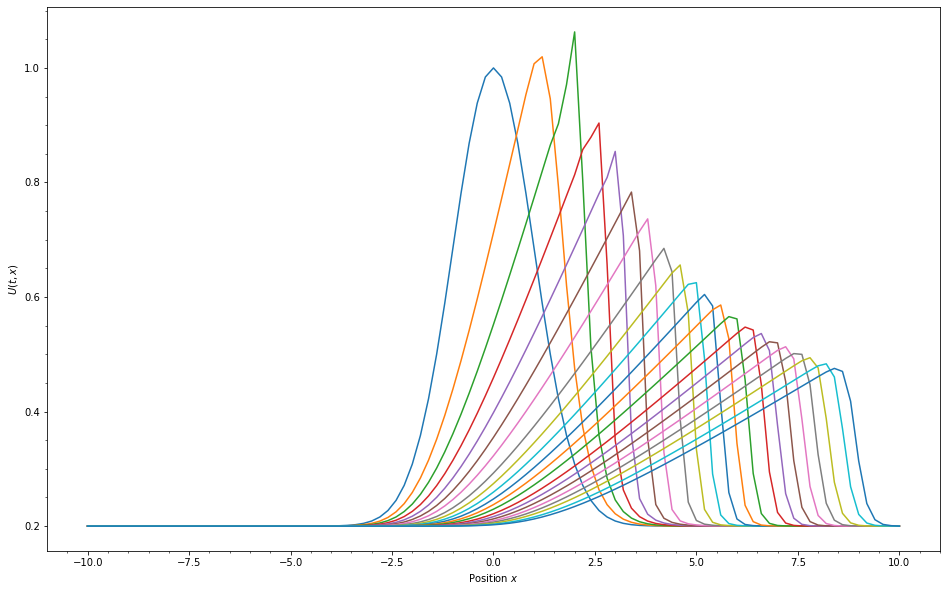

gridSize = Delta x * 1.3000000000000003
t =  1.0400000000000003
t =  2.0800000000000005
t =  3.1200000000000014
t =  4.160000000000002
t =  5.200000000000001
t =  6.24
t =  7.02
t =  8.059999999999999
t =  9.099999999999998
t =  10.139999999999997
t =  11.179999999999996
t =  12.219999999999995
t =  13.259999999999994
t =  14.039999999999994
t =  15.079999999999993
t =  16.119999999999994
t =  17.16
t =  18.200000000000006
t =  19.240000000000013
t =  20.020000000000017


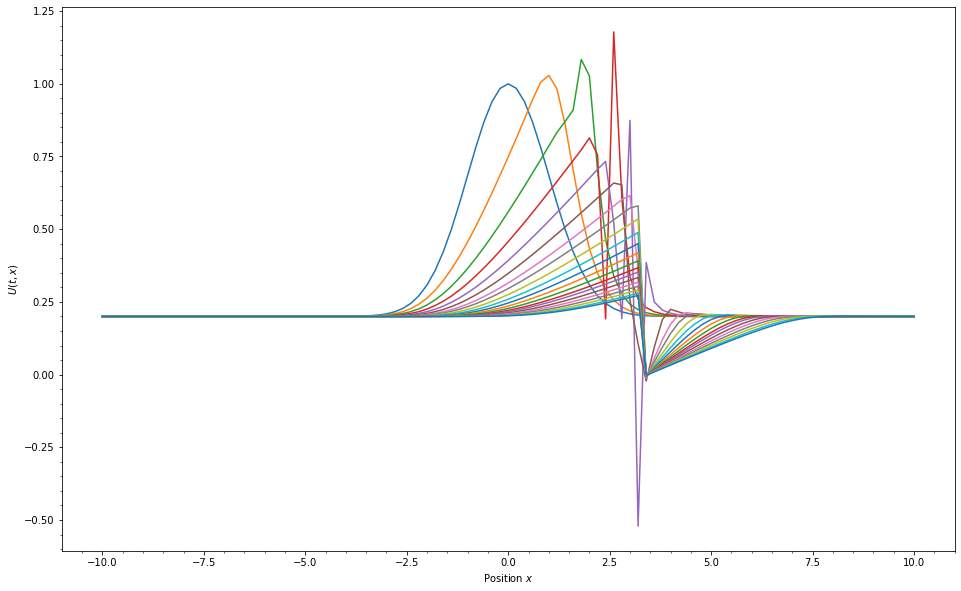

gridSize = Delta x * 1.4000000000000001
t =  1.12
t =  2.24
t =  3.080000000000001
t =  4.200000000000002
t =  5.040000000000003
t =  6.160000000000004
t =  7.000000000000004
t =  8.120000000000005
t =  9.240000000000002
t =  10.08
t =  11.199999999999998
t =  12.039999999999996
t =  13.159999999999993
t =  14.27999999999999
t =  15.119999999999989
t =  16.239999999999988
t =  17.07999999999999
t =  18.199999999999996
t =  19.04
t =  20.160000000000004


<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.


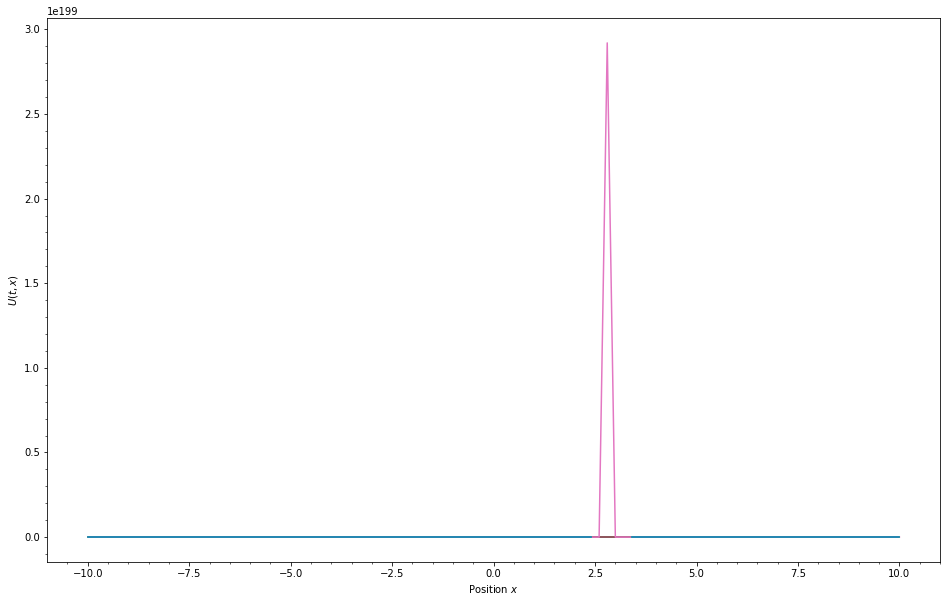

gridSize = Delta x * 1.5000000000000002
t =  1.2000000000000002
t =  2.1000000000000005
t =  3.0
t =  4.199999999999999
t =  5.099999999999999
t =  6.299999999999998
t =  7.1999999999999975
t =  8.099999999999998
t =  9.0
t =  10.200000000000003
t =  11.100000000000005
t =  12.000000000000007
t =  13.20000000000001
t =  14.100000000000012
t =  15.000000000000014
t =  16.200000000000017
t =  17.10000000000002
t =  18.00000000000002
t =  19.200000000000024
t =  20.100000000000026


<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid 

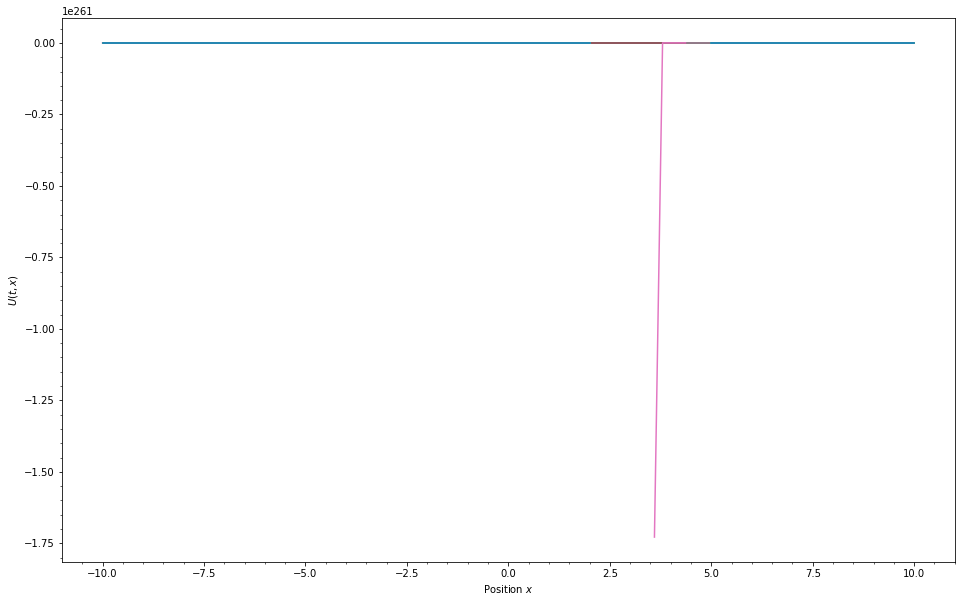

gridSize = Delta x * 1.6
t =  1.2800000000000002
t =  2.24
t =  3.200000000000001
t =  4.160000000000002
t =  5.120000000000003
t =  6.080000000000004
t =  7.0400000000000045
t =  8.000000000000005
t =  9.280000000000006
t =  10.240000000000007
t =  11.200000000000008
t =  12.160000000000009
t =  13.12000000000001
t =  14.08000000000001
t =  15.040000000000012
t =  16.00000000000001
t =  17.280000000000012
t =  18.240000000000013
t =  19.200000000000014
t =  20.160000000000014


<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow enco

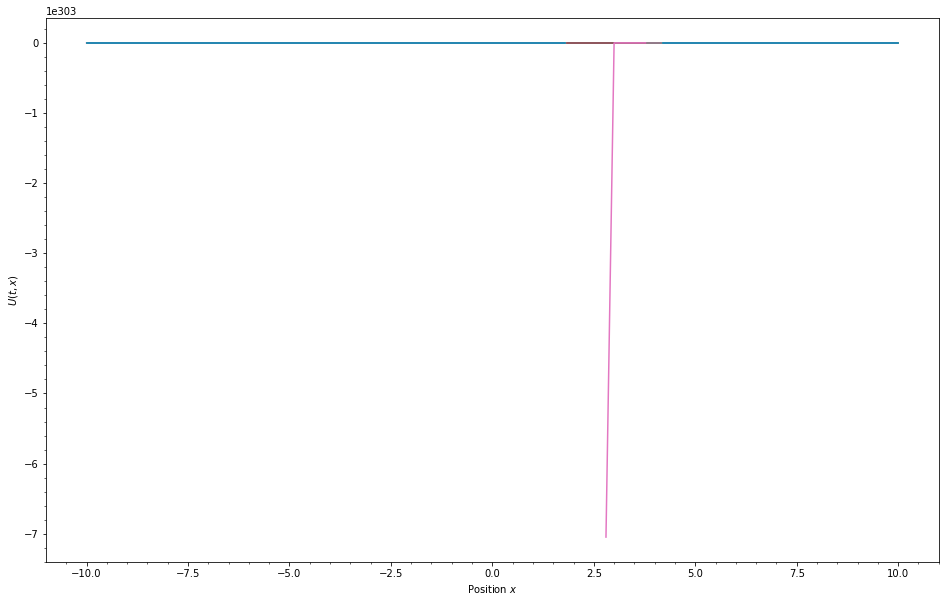

gridSize = Delta x * 1.7000000000000002
t =  1.0200000000000002
t =  2.0400000000000005
t =  3.0600000000000005
t =  4.08
t =  5.1
t =  6.119999999999999
t =  7.139999999999999
t =  8.159999999999998
t =  9.179999999999998
t =  10.199999999999998
t =  11.219999999999997
t =  12.239999999999997
t =  13.259999999999996
t =  14.279999999999996
t =  15.299999999999995
t =  16.319999999999997
t =  17.339999999999996
t =  18.019999999999996
t =  19.039999999999996
t =  20.059999999999995


<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid 

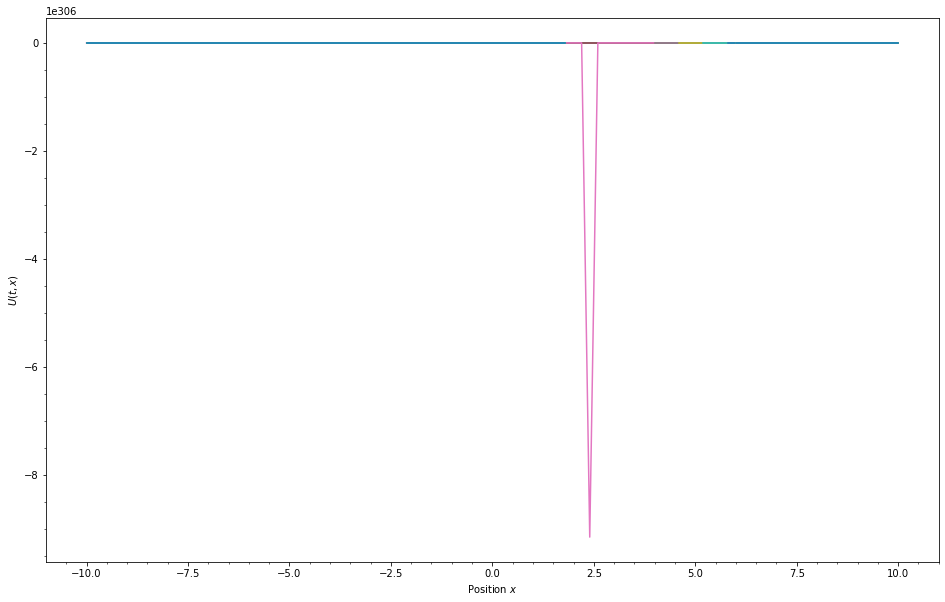

gridSize = Delta x * 1.8000000000000003
t =  1.0800000000000003
t =  2.1600000000000006
t =  3.240000000000001
t =  4.320000000000002
t =  5.040000000000003
t =  6.120000000000004
t =  7.200000000000005
t =  8.280000000000005
t =  9.000000000000004
t =  10.080000000000002
t =  11.16
t =  12.239999999999998
t =  13.319999999999997
t =  14.039999999999996
t =  15.119999999999994
t =  16.199999999999992
t =  17.27999999999999
t =  18.35999999999999
t =  19.079999999999988
t =  20.159999999999986


<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow enco

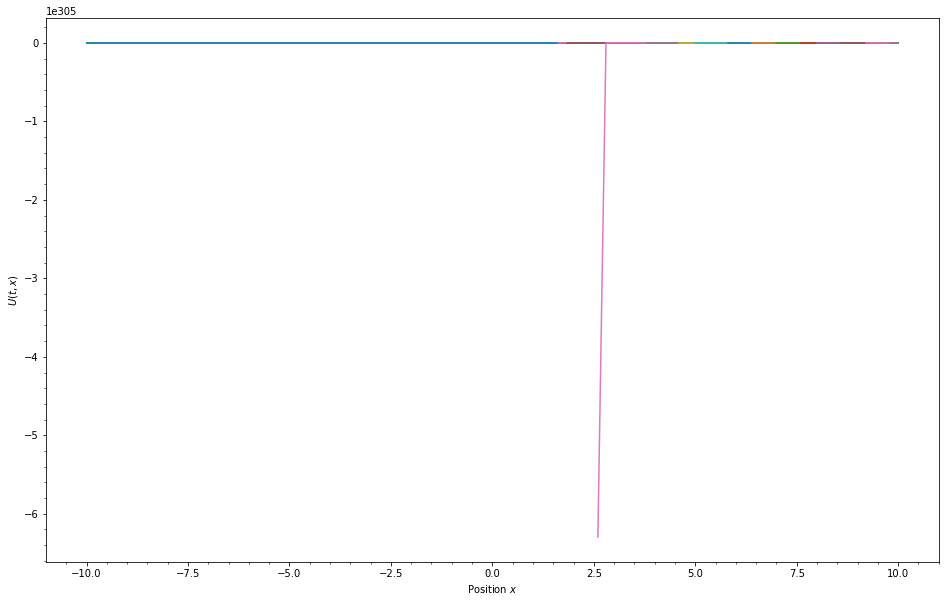

gridSize = Delta x * 1.9000000000000001
t =  1.1400000000000001
t =  2.2800000000000002
t =  3.04
t =  4.18
t =  5.319999999999999
t =  6.079999999999999
t =  7.219999999999999
t =  8.36
t =  9.120000000000001
t =  10.260000000000003
t =  11.020000000000005
t =  12.160000000000007
t =  13.30000000000001
t =  14.060000000000011
t =  15.200000000000014
t =  16.340000000000014
t =  17.100000000000012
t =  18.24000000000001
t =  19.000000000000007
t =  20.140000000000004


<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: overflow encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:41: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: invalid value encountered in double_scalars
  U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
<ipython-input-45-868f6296ee16>:44: RuntimeWarning: overflow

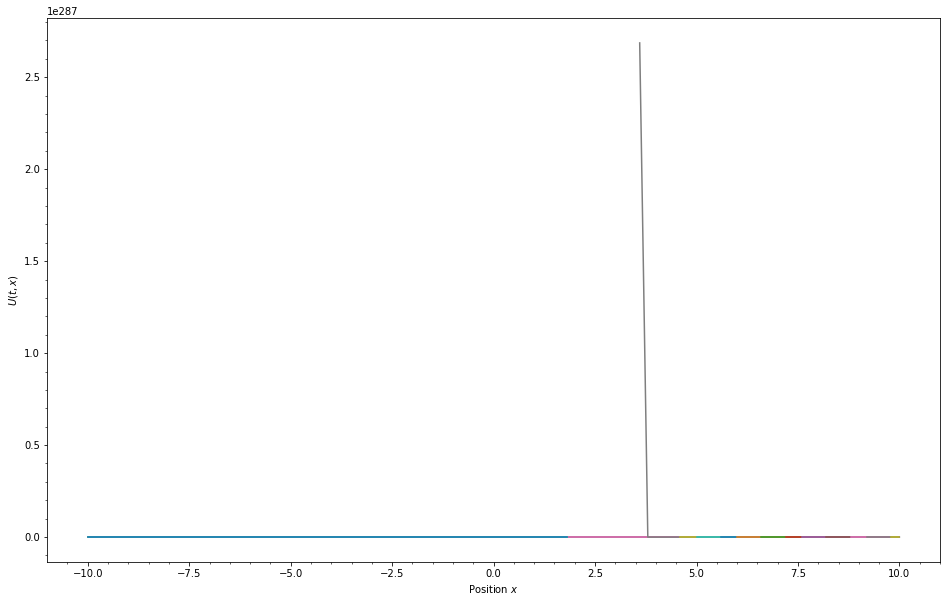

In [45]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for gridSize in np.arange(.1, 2, .1):
    # Model Parameters
    xmin = -10.0   # left boundary
    xmax = +10.0   # right boundary
    Nx = 101      # number of grid points (including boundary)
    tend = 20.0    # end time
    dtout = 1.0   # time interval for outputs

    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = gridSize * dx
    print(r"gridSize = Delta x *", gridSize)
    U = np.zeros(Nx,)

    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()

    tout = t + dtout
    while t < tend:
        Uold = np.copy(U)

        # for loop to iterate the position
        # after is an if statement to check if the U term is positive or negative
        for ix in range(1, Nx - 1):
            if Uold[ix] > 0:
                U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.

            else:
                U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.

        t += dt

        # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            print("t = ", t)
            tout += dtout
    
    plt.show()

# 3)

We can notice that in the Burger's equation that the velocity of the wave is dependant on the value of U.
This means that there will not be perfect advection since the velocity in all places is not constant. We see
the the wave skews to the left since the middle of the wave will travel faster than the sides of the wave.
We could think of the wave as a series of dirac delta functions (where their maximum is at the appropriate value
instead of being at infinity) and then each of those will advect in the expected way.

I set up a heavyside function to test this. We see that the inital part where the value of U is 0, never advances.
However, there is a slight ramp up to the next value. I believe this is due to the fact that our algorithm
takes in points from the boundaries to use for the points not on the boundary. This means that the second point
will take in the first point which will always be 0. This will give a value in between the maximum and minimum
values of our function. This will continue to make the beginning of the wave appear to diffuse out. This
also means that computationally a diract delta function would not work with our current algorithm, but I do
believe analytically it should be true since if all parts of the wave have the same value of U then they all
have same velocity and the equation would become the general 

t =  1.0000000000000004
t =  1.0200000000000005
t =  1.0400000000000005
t =  1.0600000000000005
t =  1.0800000000000005
t =  1.1000000000000005


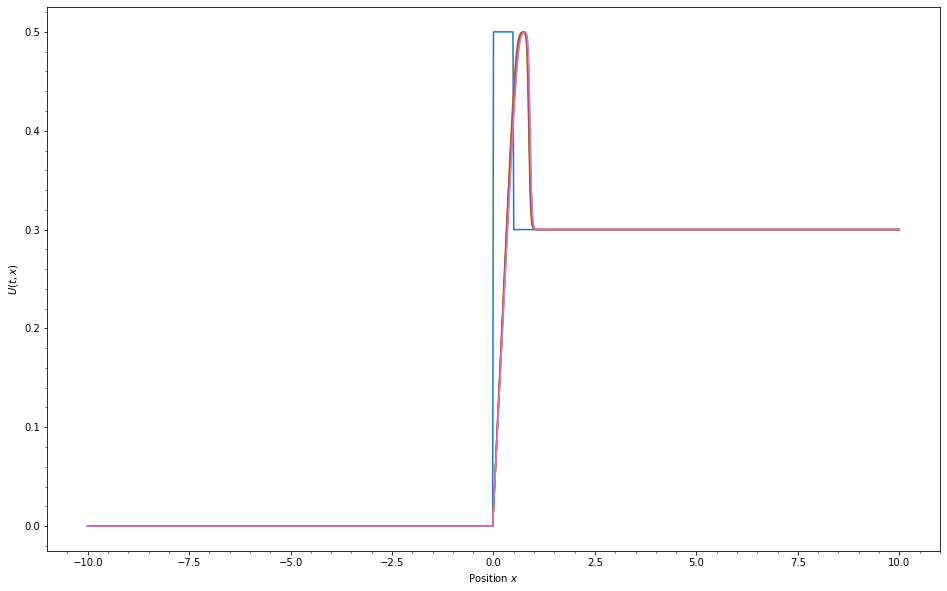

In [58]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1001     # number of grid points (including boundary)
tend = 1.10    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 1 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U[np.where(x < 0)] = 0
U[np.where(x >= 0)] = .5
U[np.where(x >= 1/2)] = .3

fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

tout = t + dtout
while t < tend:
    Uold = np.copy(U)
    
    # for loop to iterate the position
    # after is an if statement to check if the U term is positive or negative
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
            
        else:
            U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx# Task: implement upwind method here.
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        print("t = ", t)